In [1]:
jupyterlab_url = "http://localhost:8888/lab?token=91290d0ea528ffd65725eabc3106913970ed718c7b7d930a"
default_result_path = None
close_on_fail = False
transition_timeout = 10000

In [2]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcsn60amn'

# nbsearch E2E Test - Notebook Search

- Test data to prepare: Test notebooks should be indexed in Solr

In [3]:
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20251021-080319',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpf613lr47')

## Open JupyterLab and wait for it to load

Start epoch: 1761001400.458903 seconds


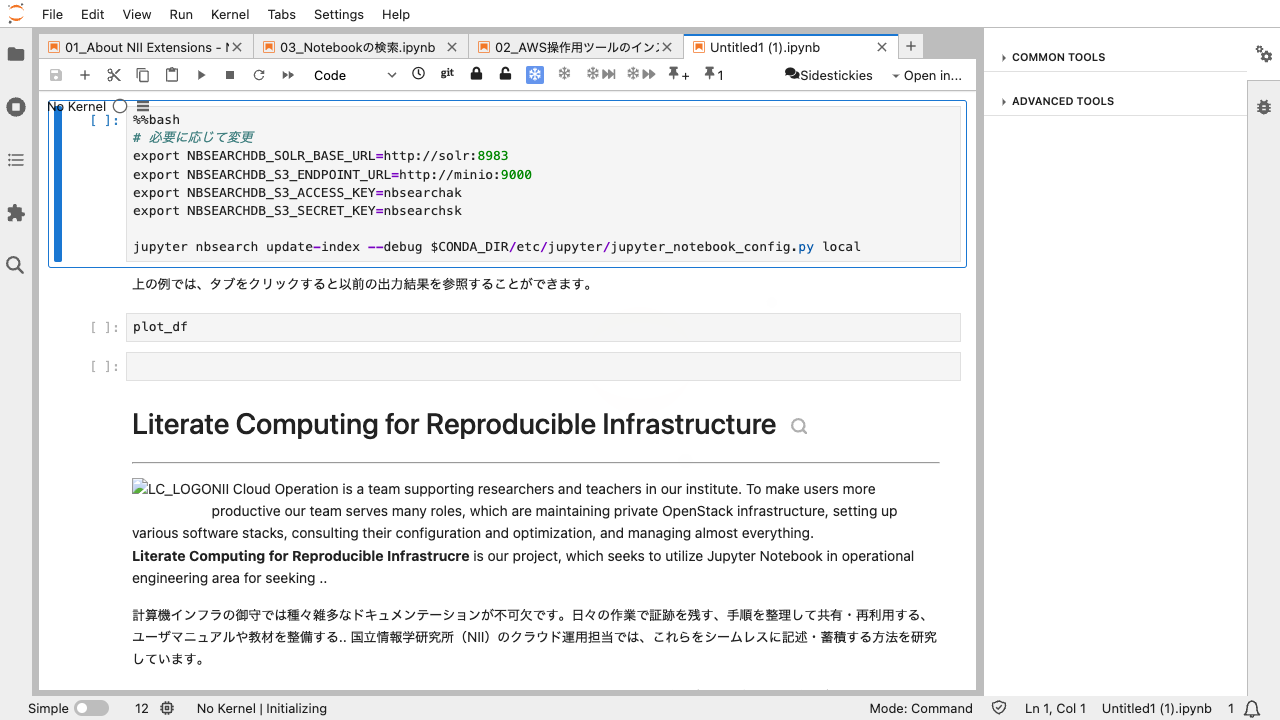

In [4]:
lab_page = None

async def _step(page):
    await page.goto(jupyterlab_url)

    # Wait for JupyterLab to load
    await expect(page.locator('#jp-main-dock-panel')).to_be_visible(timeout=transition_timeout)

    await expect(page.locator('//*[@data-icon="nbsearch::notebooksearch"]')).to_be_visible(timeout=transition_timeout)

    global lab_page
    lab_page = page

await run_pw(_step)

## Open NBSearch tab

Start epoch: 1761001402.8260758 seconds


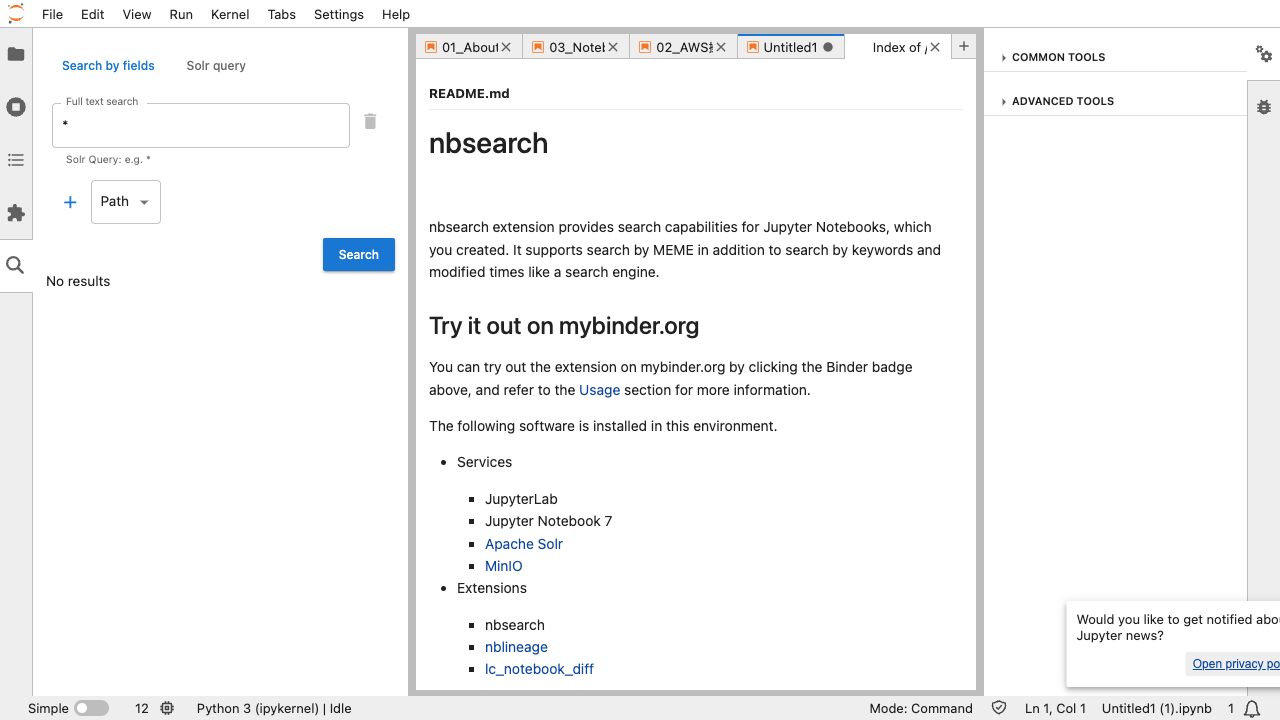

In [5]:
async def _step(page):
    # Click on the NBSearch icon in the left sidebar
    await page.locator('//*[@data-icon="nbsearch::notebooksearch"]').click()

    # Wait for the NBSearch panel to be visible
    await expect(page.locator('.nbsearch-search-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Perform a simple search

Start epoch: 1761001403.134067 seconds


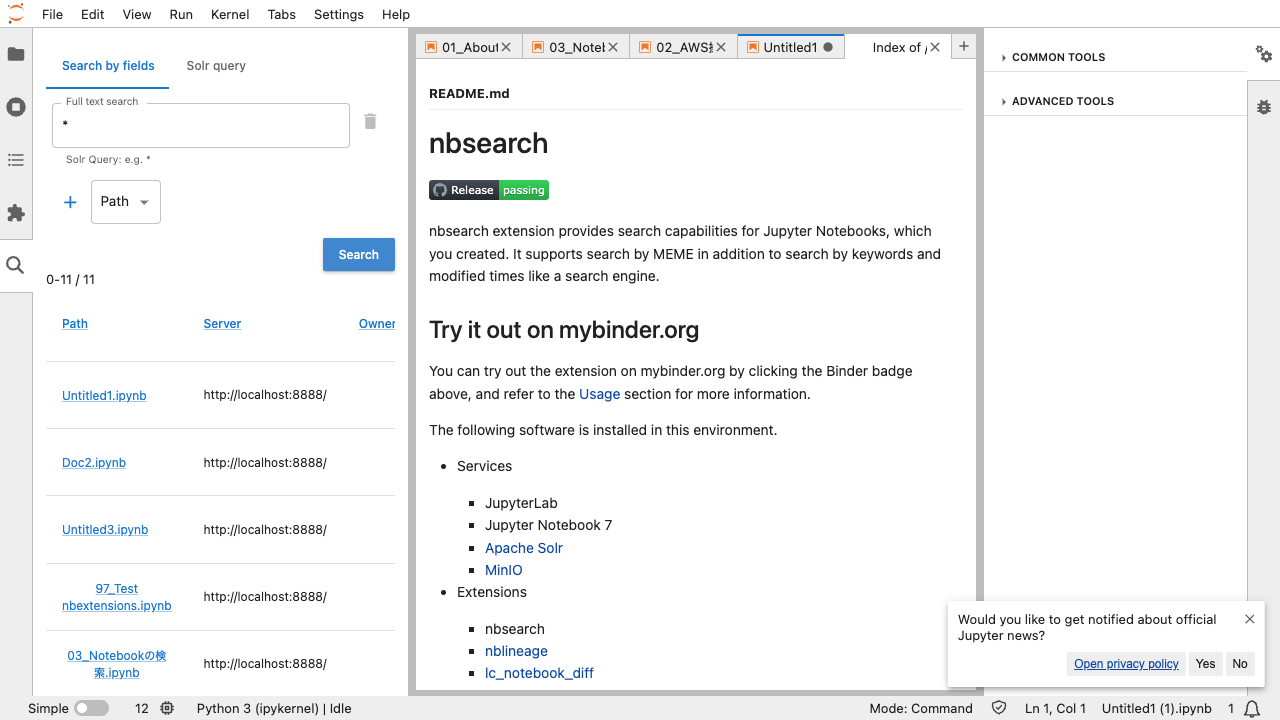

In [6]:
search_query = "*"

async def _step(page):
    # Find the search input field
    search_input = page.locator('.nbsearch-search-root input[type="text"]').first
    await search_input.fill(search_query)

    # Click the search button
    await page.locator('.nbsearch-search-execute button').click()

    # Wait for search results to appear
    await expect(page.locator('.MuiTableBody-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Verify search results are displayed

Start epoch: 1761001403.497737 seconds
Found 11 search results


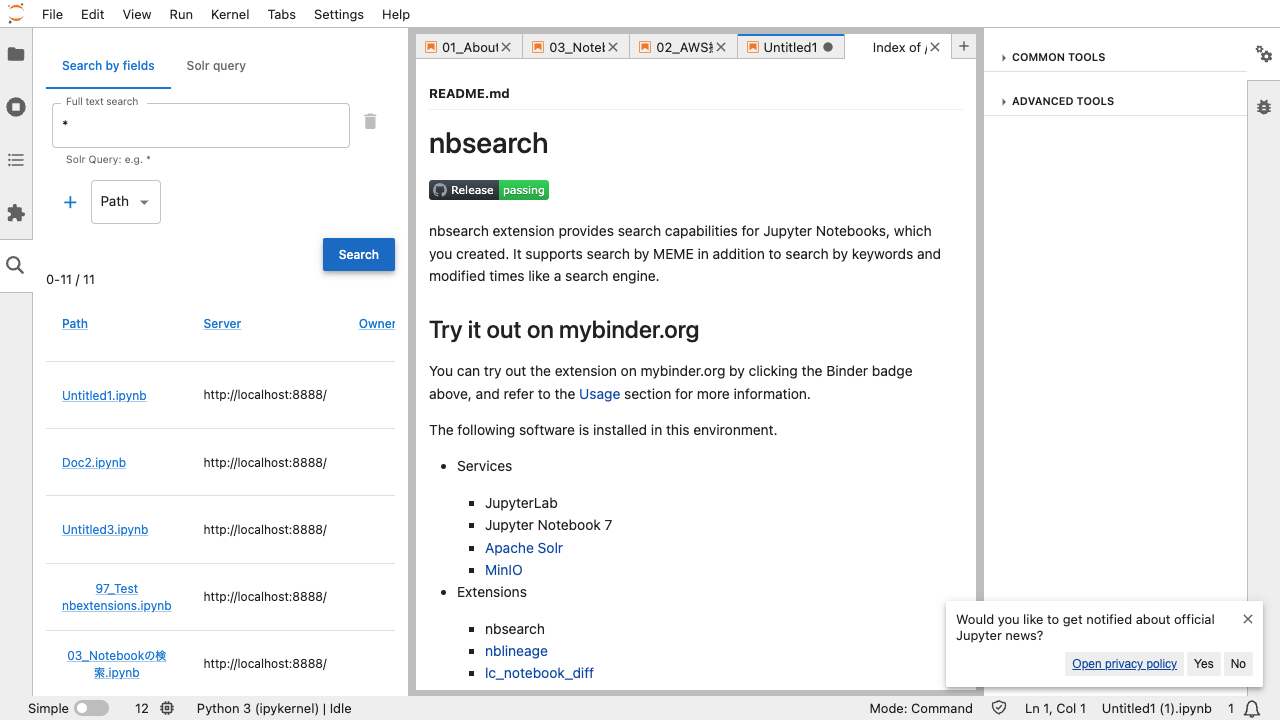

In [7]:
async def _step(page):
    # Check that at least one result row is visible
    result_rows = page.locator('.nbsearch-results-root .MuiTableBody-root tr')
    count = await result_rows.count()
    
    print(f"Found {count} search results")
    assert count > 0, "No search results found"

await run_pw(_step)

## Click the first result row to view notebook content

Start epoch: 1761001403.597978 seconds
Number of open tabs before clicking result: 4


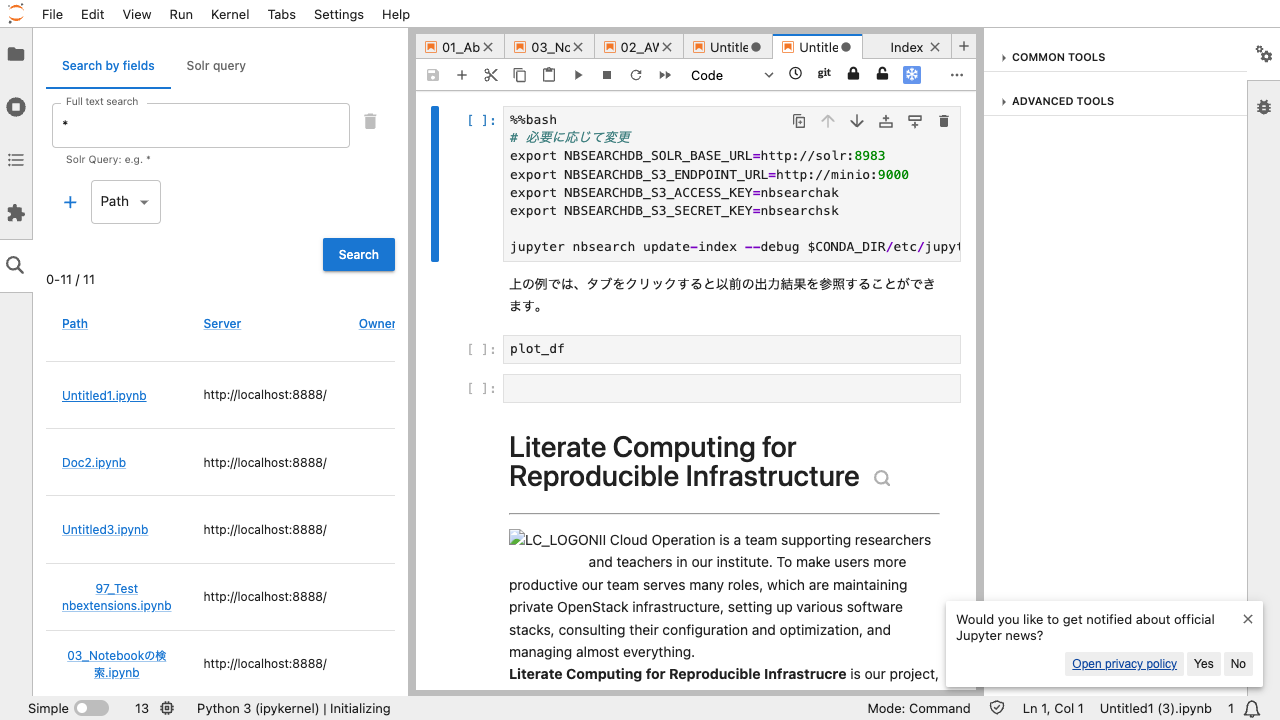

In [8]:
async def _step(page):
    tab_count = await page.locator('[data-type="document-title"]').count()
    print(f"Number of open tabs before clicking result: {tab_count}")

    # Click on the first result row
    first_row = page.locator('.nbsearch-results-root .MuiTableBody-root tr').first
    await first_row.locator('button').click()

    # Wait for the notebook tab to open
    await expect(page.locator('[data-type="document-title"]')).to_have_count(tab_count + 1, timeout=transition_timeout)

await run_pw(_step)

## Clean up

In [9]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcsn60amn/video-1.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcsn60amn/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 202, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpf613lr47/videos/0e2a2e8b67990c7519a7a4ef54572e6f.webm'


In [10]:
!rm -fr {work_dir}